In [0]:
# Makes plots / images embedded in the file
%matplotlib inline

In [0]:
from zipfile import ZipFile
from urllib.request import urlopen
import numpy as np

URL = 'https://uwmadison-cs534-term-project-f2018-cdh.github.io/assets/datasets/entities.zip'

url = urlopen(URL)
output = open('entities.zip','wb')
output.write(url.read())
output.close()

zip_ref = ZipFile('entities.zip', 'r')
zip_ref.extractall('./dataset')
zip_ref.close()

In [0]:
# Import data and keras layers

from keras import backend as k
from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, Dense, Reshape, Conv2DTranspose, MaxPooling2D, UpSampling2D
from keras.layers import Flatten, Dropout, BatchNormalization, Activation, SpatialDropout2D
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
#from tqdm import tqdm
import matplotlib.pyplot as plt

In [0]:
from tqdm import tqdm

In [92]:
import os

files = os.listdir('./dataset/entities')
for name in files:
    print(name)

entities_label.npy
entities_image.npy


In [0]:
x1_raw = np.load('./dataset/entities/entities_image.npy')
y1_raw = np.load('./dataset/entities/entities_label.npy')

x1_test = np.array([])
y1_test = np.array([])

#Optimizer
adam = Adam(lr=2e-4, beta_1=0.5)

In [94]:
unique = []
for lbl in y1_raw:
  if not lbl in unique:
    unique.append(lbl)
    print(lbl)

entities_humanoid
entities_humanoid_human
entities_humanoid_humanlike
entities_humanoid_humanlike_demonspawn
entities_humanoid_humanlike_spriggan
entities_humanoid_undead
entities_nonhumanoid
entities_nonhumanoid_aberration
entities_nonhumanoid_abyss
entities_nonhumanoid_amorphous
entities_nonhumanoid_animals
entities_nonhumanoid_aquatic
entities_nonhumanoid_demons
entities_nonhumanoid_Dragon
entities_nonhumanoid_eyes
entities_nonhumanoid_fungi_plants
entities_nonhumanoid_half-human
entities_nonhumanoid_holy
entities_nonhumanoid_log
entities_nonhumanoid_nonliving


In [0]:
filterLbls = [
    #'entities_humanoid',
    'entities_humanoid_human',
    #'entities_humanoid_humanlike',
    #'entities_humanoid_humanlike_demonspawn',
    #'entities_humanoid_humanlike_spriggan',
    #'entities_humanoid_undead',
  ]

y1_train = []

firstTime = True
for i in range(y1_raw.shape[0]):
  
  if y1_raw[i] in filterLbls:
    y1_train.append(y1_raw[i])
    
    if firstTime:
      firstTime = False
      raw = x1_raw[i,:,:,:]
      x1_train = np.reshape(raw,(1,raw.shape[0],raw.shape[1],raw.shape[2]))
    else:
      raw = x1_raw[i,:,:,:]
      raw = np.reshape(raw,(1,raw.shape[0],raw.shape[1],raw.shape[2]))
      x1_train = np.concatenate((x1_train,raw), axis=0)
    
y1_train = np.array(y1_train)

#x1_train = x1_raw
#y1_train = y1_raw


In [96]:
#Encoder1
inputShape = (32,32,4)

encoder = Sequential()
encoder.add(Conv2D(16, (3,3), activation='relu', padding='same', input_shape=inputShape)) 
#encoder.add(SpatialDropout2D(0.25))
encoder.add(Conv2D(32, (3,3), strides=(2,2), activation='relu', padding='same'))
encoder.add(Conv2D(64, (3,3), strides=(2,2), activation='relu', padding='same'))

print(encoder.summary())

#Decoder1
codeShape = (8,8,64)

decoder = Sequential()
decoder.add(Conv2DTranspose(32, (3,3), strides=(2,2), activation='relu', padding='same', input_shape=codeShape))
decoder.add(Conv2DTranspose(16, (3,3), strides=(2,2), activation='relu', padding='same'))
decoder.add(Conv2DTranspose(4, (3,3), activation='sigmoid', padding='same'))

print(decoder.summary())

#Autoencoder1
inputImage1 = Input(shape=inputShape)
x = encoder(inputImage1)
x = decoder(x)
autoencoder = Model(inputImage1, x)
print(autoencoder.summary())
print(y1_train.shape)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 16)        592       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 8, 64)          18496     
Total params: 23,728
Trainable params: 23,728
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_16 (Conv2DT (None, 16, 16, 32)        18464     
_________________________________________________________________
conv2d_transpose_17 (Conv2DT (None, 32, 32, 16)        4624      
_________________________________________________________________
c

In [97]:
encoder.trainable = True
decoder.trainable = True
autoencoder.trainable = True

history = autoencoder.fit(x1_raw, x1_raw, epochs=100, batch_size=8, shuffle=True)

Epoch 1/100
2580/2580 [==============================] - 5s 2ms/step - loss: 0.3159
Epoch 2/100
2580/2580 [==============================] - 3s 1ms/step - loss: 0.2139
Epoch 3/100
2580/2580 [==============================] - 3s 1ms/step - loss: 0.1985
Epoch 4/100
2580/2580 [==============================] - 3s 1ms/step - loss: 0.1898
Epoch 5/100
2580/2580 [==============================] - 3s 1ms/step - loss: 0.1822
Epoch 6/100
2580/2580 [==============================] - 3s 1ms/step - loss: 0.1750
Epoch 7/100
2580/2580 [==============================] - 3s 1ms/step - loss: 0.1693
Epoch 8/100
2580/2580 [==============================] - 3s 1ms/step - loss: 0.1664
Epoch 9/100
2580/2580 [==============================] - 3s 1ms/step - loss: 0.1634
Epoch 10/100
2580/2580 [==============================] - 3s 1ms/step - loss: 0.1619
Epoch 11/100
2580/2580 [==============================] - 3s 1ms/step - loss: 0.1595
Epoch 12/100
2580/2580 [==============================] - 3s 1ms/step - lo

(32, 32, 4)
(32, 32, 4)


(-0.5, 31.5, 31.5, -0.5)

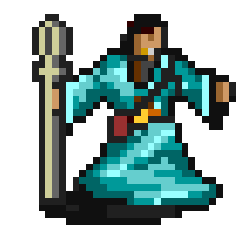

In [98]:
import random
x = random.randint(0,len(x1_train))
randImg = np.reshape(x1_train[x], (1, 32, 32, 4)) 

resultImg = encoder.predict(randImg, batch_size=1)
resultImg = decoder.predict(resultImg, batch_size=1)
randImg = randImg.reshape(32,32,4)
resultImg = resultImg.reshape(32,32,4)

print(randImg.shape)
print(resultImg.shape)
from matplotlib import pyplot as plt
plt.tight_layout()
plt.imshow(randImg)
plt.axis('off')



(-0.5, 31.5, 31.5, -0.5)

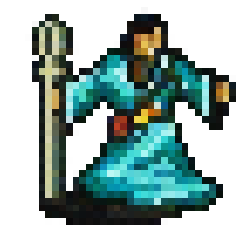

In [99]:
plt.tight_layout()
plt.imshow(resultImg)
plt.axis('off')

In [100]:
# Creating the generator
generator = Sequential()
generator.add(Dense(512*2*2, activation='relu', input_dim = 100))
generator.add(BatchNormalization())
generator.add(Reshape((2, 2, 512)))
generator.add(Conv2DTranspose(128, (5,5), strides=(2,2), padding='same', activation='relu'))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64, (5, 5), strides=(2,2), padding='same', activation='relu'))

print(generator.summary())
generator.compile(loss = 'binary_crossentropy', optimizer = adam)  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 2048)              206848    
_________________________________________________________________
batch_normalization_7 (Batch (None, 2048)              8192      
_________________________________________________________________
reshape_4 (Reshape)          (None, 2, 2, 512)         0         
_________________________________________________________________
conv2d_transpose_19 (Conv2DT (None, 4, 4, 128)         1638528   
_________________________________________________________________
batch_normalization_8 (Batch (None, 4, 4, 128)         512       
_________________________________________________________________
conv2d_transpose_20 (Conv2DT (None, 8, 8, 64)          204864    
Total params: 2,058,944
Trainable params: 2,054,592
Non-trainable params: 4,352
______________________________________________________________

In [101]:
# Creating the discriminator
discriminator = Sequential()
discriminator.add(Conv2D(32, kernel_size = (5, 5), strides = (2, 2), padding = 'same', input_shape = (32, 32, 4)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Conv2D(64, kernel_size = (5, 5), strides = (2, 2), padding = 'same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Conv2D(128, kernel_size = (5, 5), strides = (2, 2), padding = 'same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Flatten())
discriminator.add(Dropout(0.3))
discriminator.add(Dense(1, activation = 'sigmoid'))

print(discriminator.summary())
discriminator.compile(loss = 'binary_crossentropy', optimizer = adam) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 16, 16, 32)        3232      
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 4, 4, 128)         204928    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
__________

In [102]:
# Create the GAN
#decoder.trainable = False
#encoder.trainale = False

discriminator.trainable = False

gan = Sequential()
gan.add(generator)
gan.add(decoder)
#gan.add(encoder)
gan.add(discriminator)

encoder.trainable = False
decoder.trainable = False
autoencoder.trainable = False

gan.compile(loss = 'binary_crossentropy', optimizer = adam)
print(gan.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_18 (Sequential)   (None, 8, 8, 64)          2058944   
_________________________________________________________________
sequential_17 (Sequential)   (None, 32, 32, 4)         23668     
_________________________________________________________________
sequential_19 (Sequential)   (None, 1)                 261473    
Total params: 2,344,085
Trainable params: 2,054,592
Non-trainable params: 289,493
_________________________________________________________________
None


In [0]:
encoder.trainable = False
decoder.trainable = False
autoencoder.trainable = False

In [0]:
# Visualize generated data
def plotGeneratedImages():
  generated_images = decoder.predict(generator.predict(noise))
  fig = plt.figure(figsize=(9, 9))        
  for i in range(9 if generated_images.shape[0] > 9 else generated_images.shape[0]):
    plt.subplot(3, 3, i+1)
    img = np.clip(generated_images[i, :],0,1)
    img = img.reshape((32, 32, 4))
    plt.tight_layout()
    plt.imshow(img)
    plt.axis('off')

99 0.0 4.386240460655906: 100%|██████████| 11/11 [00:00<00:00, 18.39it/s]


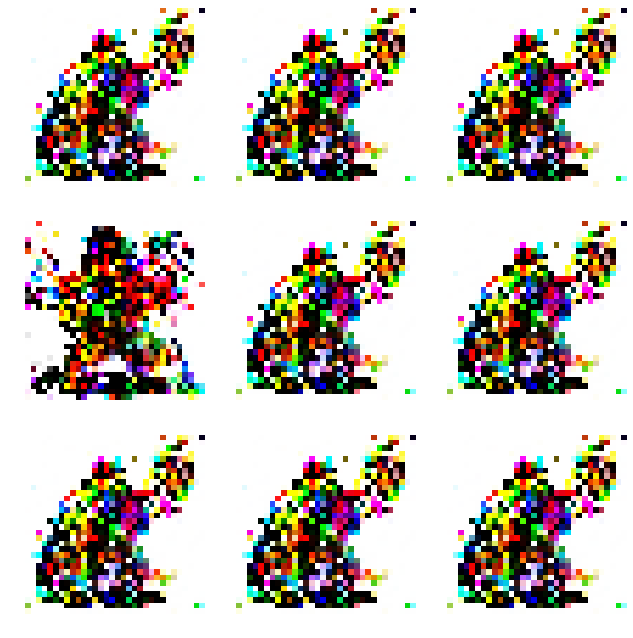

In [114]:
epochs = 100
batch_size = 32

dloss_sum = 0
gloss_sum = 100000

batch_count = int(x1_train.shape[0] / batch_size)

for epoch in range(epochs):
  
    dloss = dloss_sum / batch_count
    dloss_sum = 0
    
    gloss = gloss_sum / batch_count
    gloss_sum = 0

    for index in tqdm(range(batch_count), desc=str(epoch) + " " + str(dloss) + " " + str(gloss)):
        
        # Real images
        image_batch = x1_train[index * batch_size: (index + 1) * batch_size]
        
        # Get initial random input for generator
        noise = np.random.uniform(-1, 1, size=[batch_size, 100])
        
        # Generating images
        generated_data = generator.predict_on_batch(noise)
        generated_data = decoder.predict_on_batch(generated_data)

        # Train discriminator
        if gloss < 5: 
          X = np.concatenate((image_batch,generated_data))
          y = np.concatenate((np.zeros(image_batch.shape[0]),np.ones(generated_data.shape[0])))

          discriminator.trainable = True
          dloss_sum += discriminator.train_on_batch(x=X, y=y)
        
        # Train generator 
        y = np.zeros(batch_size)
        discriminator.trainable = False
        gloss_sum += gan.train_on_batch(x=noise, y=y)
        
        img = generated_images = decoder.predict(generator.predict(noise))
        
    
plotGeneratedImages()


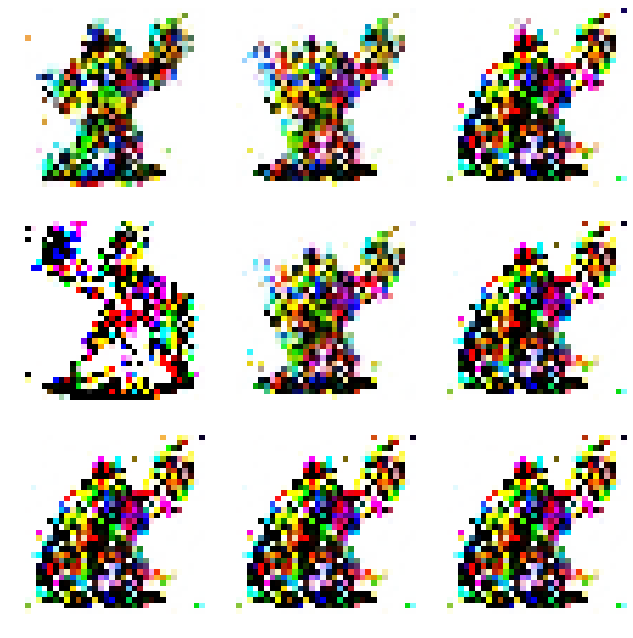

In [116]:
noise = np.random.uniform(-1, 1, size=[9, 100])
plotGeneratedImages()

In [0]:
encoder.trainable = True
decoder.trainable = True
autoencoder.trainable = True

In [0]:
x1_train = x1_raw